In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pl
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("cleaned_BlackFriday_sales.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [20]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


Creating new column in the dataset by combining the Gender and martial_status attributes

In [22]:
lst=[]
for i in range(len(df)):
    x=df["Gender"][i]+"_"+str(df["Marital_Status"][i])
    lst.append(x)
df["Martial_Gender"]=lst

In [23]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Martial_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0
...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664,M_0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196,M_0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043,M_0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172,M_0


who did the most purchases male or females and either they married or not?

<Axes: xlabel='Martial_Gender'>

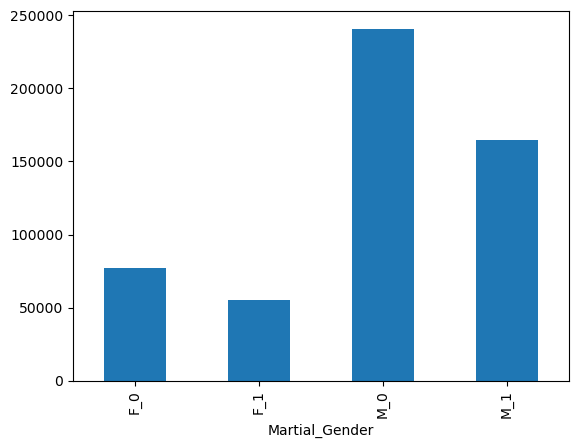

In [30]:
df.groupby("Martial_Gender").size().plot(kind="bar")

from the above bar graph we can observe that the most number of purchases were done by unmarried males followed by married males ,unmarried females and married females

which age  category of the female,male married or unmarried did the most number of purchases?

<Axes: xlabel='Age', ylabel='count'>

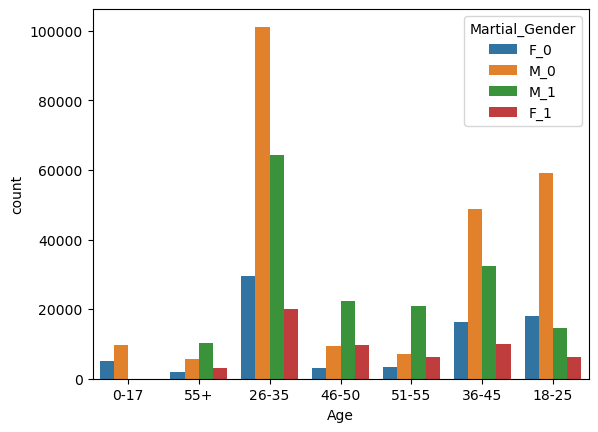

In [40]:
sns.countplot(x=df["Age"],hue=df["Martial_Gender"])

For the age category 0-17, most purchases were made by unmarried males, followed by unmarried females.  

For the age category 18-25, unmarried males accounted for the majority of purchases, followed by unmarried females, married males, and lastly, married females. This trend can be attributed to the fact that fewer individuals tend to marry under the age of 25.  

For the age category 26-35, the highest number of purchases were made by unmarried males, followed by married males, unmarried females, and finally married females.  

For the age category 36-45, unmarried males again led in purchases, followed by married males, unmarried females, and married females.  

For the age category 46-50, the majority of purchases were made by married males, likely because most individuals in this age range are married. They were followed by married females, unmarried males, and finally unmarried females.  

For the age category 51-55, married males made the most purchases, followed by unmarried males, married females, and lastly unmarried females.  

For the age category 55 and above, married males topped the list, followed by unmarried males, married females, and unmarriedorate further!

which martial gender contributed to the most purchases in each of the city?

<Axes: xlabel='City_Category', ylabel='count'>

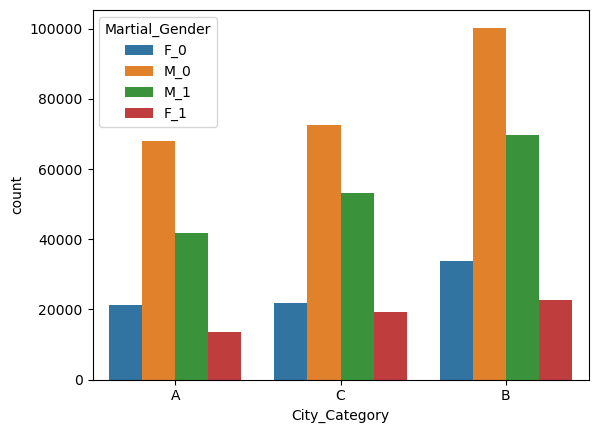

In [42]:
sns.countplot(x=df["City_Category"],hue=df["Martial_Gender"])

In City A, the majority of purchases were made by unmarried males, followed by married males, unmarried females, and lastly, married females. This trend may be attributed to the fact that males generally earn more than females, and among them, unmarried males tend to have fewer financial responsibilities, allowing them to allocate more of their income to discretionary spending.

The same pattern is observed across all cities, with City B leading in overall contributions, followed by City C and City A.

what products were mostly purchased by individual categories of martial gender?

<Axes: xlabel='Product_Category_1', ylabel='count'>

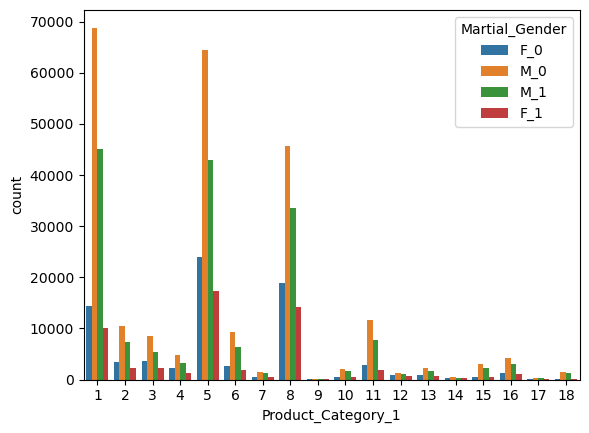

In [48]:
sns.countplot(x=df["Product_Category_1"],hue=df["Martial_Gender"])

From the above bar graph, it can be observed that:

- Unmarried males predominantly purchased products from category 1, followed by categories 5, 8, 11, 2, 3, 6, 4, and others.  
- Married males also primarily purchased products from category 1, followed by categories 5, 8, 11, 2, 6, 3, 4, and others.  
- Unmarried females showed a preference for products from category 5, followed by categories 8, 1, 3, 2, 6, 4, 11, and others.  
- Married females mostly purchased products from category 5, followed by categories 8, 1, 3, 2, 11, 4, and others.  

From this data, we can conclude that product category 5 is predominantly favored or used by females, whereas product category 1 is the most preferred among males.

which category of martial gender were mostly residing for a largest period?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

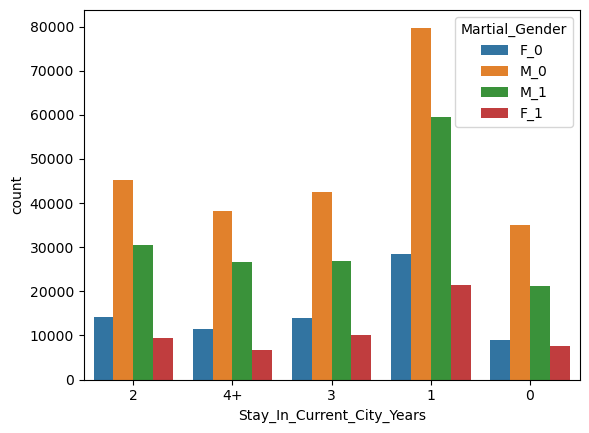

In [50]:
sns.countplot(x=df["Stay_In_Current_City_Years"],hue=df["Martial_Gender"])

From the bar graph, it is evident that unmarried males have the longest duration of residence, followed by married males, unmarried females, and married females. This trend can be attributed to the fact that males often migrate to cities earlier in search of employment opportunities. In contrast, females tend to exhibit lower residence durations, likely due to factors such as family responsibilities and marriage-related considerations